In [32]:
import pickle 
import numpy as np
import pandas as pd
import statistics
from PIL import Image
import os 
import random
import time
import matplotlib.pyplot as plt
import netaddr

In [33]:
#pip install netaddr

In [34]:
cwd = os.getcwd()

In [35]:
cwd

'C:\\Users\\jghadermazi\\Box\\GNN Project\\Code files'

In [ ]:
#directory should change based on the device, for laptop it should be users//jalal for office desktop it is users//jghadermazi

In [8]:
wed_data = pd.read_pickle(r'C:\\Users\\jghadermazi\\Box\\GAN Project\\Sample data\\Friday_Packet_Level_Data.pkl')

In [36]:
df1 = wed_data.copy()

In [37]:
df1[['Payload']] = df1[['Payload']].replace('', '00')

In [38]:
df1

,Epoch Time,Source IP,Dst IP,Source Port,Dst Port,Stream Index,Sequence Number,Eth Header,IP Header,TCP Header,Payload,Direction,Binary Label,Class Label
0,1499432653.990571000,192.168.10.9,205.174.165.73,1841,8080,13099,0,00c1b114eb31b8ac6f1d1f6c0800,450000346c8f40008006508bc0a80a09cdaea549,07311f905c691851000000008002200075eb0000020405...,00,fwd,1.0,12.0
1,1499432653.991397000,205.174.165.73,192.168.10.9,8080,1841,13099,0,b8ac6f1d1f6c00c1b114eb310800,45000034000040003e06ff1acdaea549c0a80a09,1f90073113dd44cb5c69185280127210cb220000020405...,00,bwd,1.0,12.0
2,1499432653.991520000,192.168.10.9,205.174.165.73,1841,8080,13099,1,00c1b114eb31b8ac6f1d1f6c0800,450000286c90400080065096c0a80a09cdaea549,07311f905c69185213dd44cc501001007d050000,000000000000,fwd,1.0,12.0
3,1499432653.992542000,192.168.10.9,205.174.165.73,1841,8080,13099,1,00c1b114eb31b8ac6f1d1f6c0800,450000ea6c91400080064fd3c0a80a09cdaea549,07311f905c69185213dd44cc50180100307c0000,474554202f6170692f706f703f626f7469643d6d697461...,fwd,1.0,12.0
4,1499432653.993057000,205.174.165.73,192.168.10.9,8080,1841,13099,1,b8ac6f1d1f6c00c1b114eb310800,45000028822a40003e067cfccdaea549c0a80a09,1f90073113dd44cc5c691914501000ed7c560000,000000000000,bwd,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260217,1499454300.212460000,172.217.12.205,192.168.10.14,443,58093,280715,3982,b8ac6f3607ee00c1b114eb310800,450000f7dfe60000340621beacd90ccdc0a80a0e,01bbe2eda84cbf47d787ec2350180169decb0000,17030300ca0000000000000003b9423a0b5901a1d34005...,bwd,0.0,0.0
5260218,1499454300.212688000,172.217.12.205,192.168.10.14,443,58093,280715,4189,b8ac6f3607ee00c1b114eb310800,4500019ddfe7000034062117acd90ccdc0a80a0e,01bbe2eda84cc016d787ec2350180169e0870000,1703030170000000000000000427cfa8c91d47cda4d459...,bwd,0.0,0.0
5260219,1499454300.212736000,172.217.12.205,192.168.10.14,443,58093,280715,4562,b8ac6f3607ee00c1b114eb310800,450000acdfe8000034062207acd90ccdc0a80a0e,01bbe2eda84cc18bd787ec235018016903ef0000,170303007f000000000000000529465b5b09e2c6a7bf19...,bwd,0.0,0.0
5260220,1499454300.212738000,172.217.12.205,192.168.10.14,443,58093,280715,4694,b8ac6f3607ee00c1b114eb310800,45000056dfe900003406225cacd90ccdc0a80a0e,01bbe2eda84cc20fd787ec2350180169e55a0000,170303002900000000000000066521f26029ac678a3244...,bwd,0.0,0.0


In [39]:
#benign    0
#dos slowloris    1
#dos slowhttptest   2
#dos hulk     3
#dos goldeneye    4
#heartbleed    5
#ftp patator    6
#ssh patator    7
#webattack bruteforce    8
#webattack xss     9
#webattack sql injection 10
#infiltration     11
#botnet     12
#portscan   13
#ddos     14

In [40]:
df1['Class Label'].value_counts()

0.0     3661387
14.0    1265657
13.0     323307
12.0       9871
Name: Class Label, dtype: int64

In [41]:
df = df1[df1['Class Label']== 14]

In [42]:
df = df.reset_index(inplace = False)

In [43]:
streams_lst = list(df['Stream Index'].unique())

In [44]:
len(streams_lst)

167232

In [192]:
random.seed(0)
imlist = random.sample(streams_lst, 5000)

In [193]:
df = df.loc[df['Stream Index'].isin(imlist)]

In [194]:
df = df.reset_index(inplace = False)

In [45]:
df

,index,Epoch Time,Source IP,Dst IP,Source Port,Dst Port,Stream Index,Sequence Number,Eth Header,IP Header,TCP Header,Payload,Direction,Binary Label,Class Label
0,333178,1499449939.766403000,172.16.0.1,192.168.10.50,42849,9090,90014,0,0019b90a69f100c1b114eb310800,4500002c3ea300003006d53dac100001c0a80a32,a76123820ff6a9530000000060020400990d0000020405b4,0000,fwd,1.0,14.0
1,333179,1499449939.766424000,192.168.10.50,172.16.0.1,1521,42849,90013,1,00c1b114eb310019b90a69f10800,45000028aff14000400613f3c0a80a32ac100001,05f1a761000000000ff6a95450140000d2470000,000000000000,bwd,1.0,14.0
2,333180,1499449939.766430000,192.168.10.50,172.16.0.1,631,42849,90012,1,00c1b114eb310019b90a69f10800,45000028aff04000400613f4c0a80a32ac100001,0277a761000000000ff6a95450140000d5c10000,000000000000,fwd,1.0,14.0
3,333181,1499449939.766445000,172.16.0.1,192.168.10.50,42849,51493,90015,0,0019b90a69f100c1b114eb310800,4500002c5b3d00003606b2a3ac100001c0a80a32,a761c9250ff6a9530000000060020400f3690000020405b4,0000,fwd,1.0,14.0
4,333182,1499449939.766451000,192.168.10.50,172.16.0.1,9090,42849,90014,1,00c1b114eb310019b90a69f10800,45000028aff24000400613f2c0a80a32ac100001,2382a761000000000ff6a95450140000b4b60000,000000000000,bwd,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265652,1598830,1499454016.102778000,172.16.0.1,192.168.10.50,19397,80,257118,0,0019b90a69f100c1b114eb310800,450000343f7f40007e064659ac100001c0a80a32,4bc50050dc82909a00000000800220001ef20000020405...,00,fwd,1.0,14.0
1265653,1598831,1499454016.102787000,192.168.10.50,172.16.0.1,80,19397,257118,0,00c1b114eb310019b90a69f10800,45000034000040004006c3d8c0a80a32ac100001,00504bc587f1afafdc82909b8012721095300000020405...,00,bwd,1.0,14.0
1265654,1598832,1499454016.102841000,172.16.0.1,192.168.10.50,19398,80,257119,0,0019b90a69f100c1b114eb310800,450000343f8040007e064658ac100001c0a80a32,4bc60050351ace0f000000008002200088e40000020405...,00,fwd,1.0,14.0
1265655,1598833,1499454016.102865000,172.16.0.1,192.168.10.50,19399,80,257120,0,0019b90a69f100c1b114eb310800,450000343f8140007e064657ac100001c0a80a32,4bc700507d93999d000000008002200074dc0000020405...,00,fwd,1.0,14.0


In [46]:
streams_lst = list(df['Stream Index'].unique())

In [47]:
len(streams_lst)

167232

In [198]:
ip_header_lst = []

for i in range(len(df)):
    x = df['IP Header'][i]
    byte_array = bytes.fromhex(x)
    byte_lst = list(byte_array)
    if (len(byte_lst) < 20):
            output = np.pad(byte_lst, (0, 20-len(byte_lst)), 'constant')
    else:
            output = np.array(byte_lst[0:20].copy())
            
    output = np.delete(output, [0, 1, 9, 12, 13, 14, 15, 16, 17, 18, 19])
    
    output = np.abs(output.astype(float))/255
    ip_header_lst.append(output)
    
df['IP Header Array'] = ip_header_lst

In [199]:
tcp_header_lst = []

for i in range(len(df)):
    x = df['TCP Header'][i]
    byte_array = bytes.fromhex(x)
    byte_lst = list(byte_array)
    if (len(byte_lst) < 20):
            output = np.pad(byte_lst, (0, 20-len(byte_lst)), 'constant')
    else:
            output = np.array(byte_lst[0:20].copy())
            
    output = np.delete(output, [0, 1, 2, 3])
    output = np.abs(output.astype(float))/255
    
    tcp_header_lst.append(output)
    
df['TCP Header Array'] = tcp_header_lst

In [200]:
df['pkt_header_values'] = df.apply(lambda x : (np.append(x['IP Header Array'], x['TCP Header Array'])), axis=1)

In [201]:
new_cols = ['Source IP', 'Dst IP', 'Source Port', 'Dst Port','Epoch Time','Stream Index', 'Sequence Number', 'Direction', 'pkt_header_values']
df = df[new_cols]

In [228]:
df

,Source IP,Dst IP,Source Port,Dst Port,Epoch Time,Stream Index,Sequence Number,Direction,pkt_header_values
0,172.16.0.1,192.168.10.50,42849,9878,1499449939.769395000,90030,0,bwd,"[0.0, 0.17254901960784313, 0.3215686274509804,..."
1,192.168.10.50,172.16.0.1,9878,42849,1499449939.769447000,90030,1,fwd,"[0.0, 0.1568627450980392, 0.6901960784313725, ..."
2,172.16.0.1,192.168.10.50,42849,8300,1499449939.770055000,90047,0,bwd,"[0.0, 0.17254901960784313, 0.6980392156862745,..."
3,192.168.10.50,172.16.0.1,8300,42849,1499449939.770102000,90047,1,bwd,"[0.0, 0.1568627450980392, 0.6901960784313725, ..."
4,172.16.0.1,192.168.10.50,42849,1100,1499449939.771106000,90075,0,bwd,"[0.0, 0.17254901960784313, 0.7686274509803922,..."
...,...,...,...,...,...,...,...,...,...
36574,192.168.10.50,172.16.0.1,80,57580,1499454016.087625000,257078,1,fwd,"[0.0, 0.1568627450980392, 0.6862745098039216, ..."
36575,172.16.0.1,192.168.10.50,55524,80,1499454016.088141000,257043,21,fwd,"[0.0, 0.1568627450980392, 0.1803921568627451, ..."
36576,172.16.0.1,192.168.10.50,55541,80,1499454016.089792000,257100,1,fwd,"[0.0, 0.1568627450980392, 0.1803921568627451, ..."
36577,172.16.0.1,192.168.10.50,55541,80,1499454016.089949000,257100,1,fwd,"[0.0, 0.23529411764705882, 0.1803921568627451,..."


In [229]:
streams_lst = list(df['Stream Index'].unique())
print('Total number of flows in class:', len(streams_lst))    
random.shuffle(streams_lst)

df_2pkt =pd.DataFrame(columns = ['src_node', 'dst_node', 'stream_number','pkt_vals'])
num_pkt = 4
pkt_val_pad = [0] * 25


for j in range(len(streams_lst)):

    df_stream = df[df['Stream Index'] == streams_lst[j]]


    df_stream = df_stream.sort_values(by = 'Epoch Time')
    df_stream = df_stream.reset_index(drop=True)
    
    
    if len(df_stream) >= num_pkt:
           
        src_node = (int(netaddr.IPAddress(df_stream['Source IP'][0])), int(df_stream['Source Port'][0]))
        dst_node = (int(netaddr.IPAddress(df_stream['Dst IP'][0])), int(df_stream['Dst Port'][0]))
        stream_no = df_stream['Stream Index'][0]
    
        pkt_val_seq = []

        for k in range(0, num_pkt):
            
            pkt_val = []
            if df_stream['Direction'][k] == 'fwd':
                pkt_val = [*df_stream['pkt_header_values'][k], *pkt_val_pad]
            else:
                pkt_val = [*pkt_val_pad, *df_stream['pkt_header_values'][k]]
                
            pkt_val_seq.extend(pkt_val)
        
        
        df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq}, 
                ignore_index = True)
    
    


Total number of flows in class: 5000


C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jalal\AppData\Local\Temp\ipykernel_8292\4033676000.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2pkt = df_2pkt.append({'src_node' : src_node, 'dst_node' : dst_node, 'stream_number': stream_no, 'pkt_vals' : pkt_val_seq},
C:\Users\Jala

In [230]:
df_2pkt['src_node'].value_counts()

(3232238130, 80)       5
(2886729729, 52397)    2
(2886729729, 52351)    2
(2886729729, 52069)    2
(2886729729, 53936)    2
                      ..
(3232238096, 41992)    1
(3232238097, 58726)    1
(2886729729, 50111)    1
(2886729729, 53947)    1
(3232238096, 36612)    1
Name: src_node, Length: 1011, dtype: int64

In [231]:
#pip install networkx

In [232]:
import networkx as nx

In [233]:
df_nx = df_2pkt[0:50]

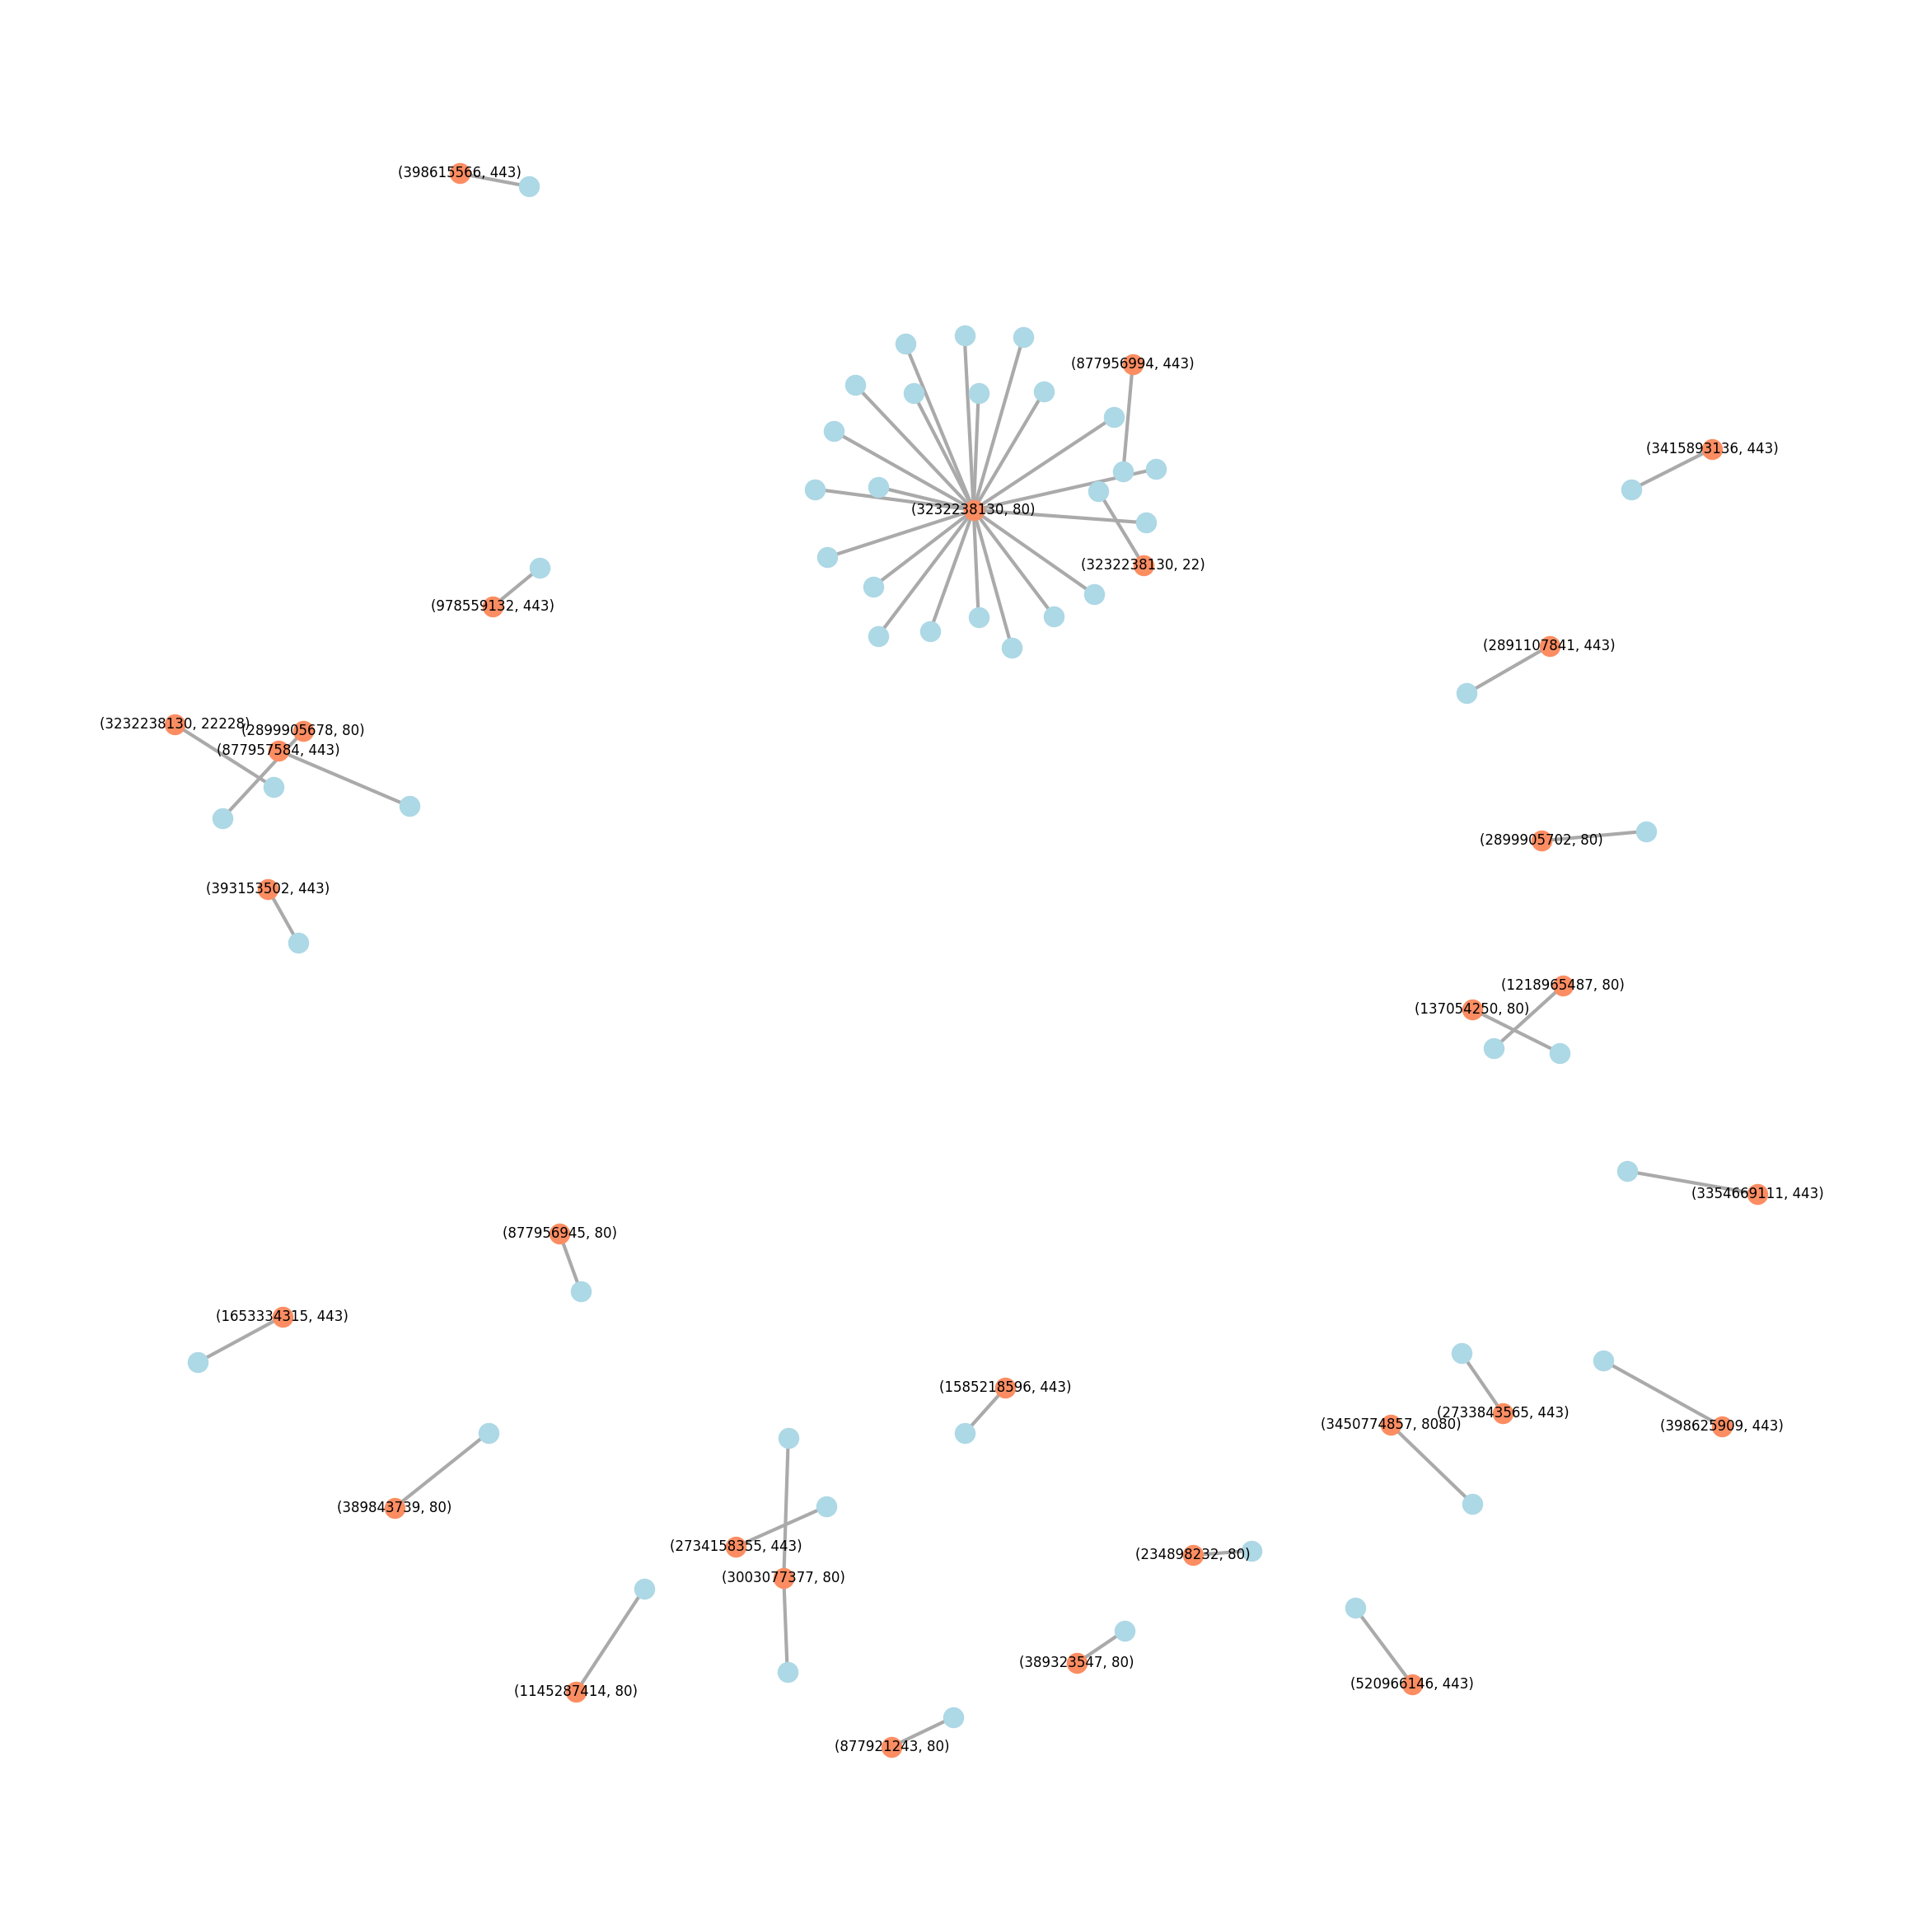

In [234]:
plt.figure(figsize=(30, 30))

g = nx.from_pandas_edgelist(df_nx, 'src_node', 'dst_node') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=20)


src = df_nx['src_node'].unique()
target = df_nx['dst_node'].unique()

          

nx.draw_networkx_nodes(g, layout, nodelist=target, node_color='#fc8d62')
         
nx.draw_networkx_nodes(g, layout, nodelist=src, node_color='lightblue')

nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA', width=3)

club_dict = dict(zip(target, target))
nx.draw_networkx_labels(g, layout, labels=club_dict)

plt.axis('off')
plt.show()

In [235]:
#df_p = pd.DataFrame(df.pkt_vals.values.tolist()).add_prefix('header_byte_')

In [236]:
#df1 = pd.concat([df, df_p ], axis =1)

In [237]:
df_2pkt

,src_node,dst_node,stream_number,pkt_vals
0,"(3232238085, 55327)","(2899905678, 80)",235293,"[0.0, 0.20392156862745098, 0.1568627450980392,..."
1,"(3232238092, 50340)","(234898232, 80)",238294,"[0.0, 0.23529411764705882, 0.596078431372549, ..."
2,"(3232238085, 55693)","(3003077377, 80)",236355,"[0.0, 0.20392156862745098, 0.43529411764705883..."
3,"(3232238094, 57827)","(520966146, 443)",234617,"[0.0, 0.20392156862745098, 0.03529411764705882..."
4,"(3232238096, 59656)","(2899905702, 80)",248498,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1017,"(2886729729, 53282)","(3232238130, 22)",141814,"[0.0, 0.23529411764705882, 0.06666666666666667..."
1018,"(2886729729, 51551)","(3232238130, 80)",244236,"[0.0, 0.20392156862745098, 0.20392156862745098..."
1019,"(2886729729, 15214)","(3232238130, 80)",242569,"[0.0, 0.20392156862745098, 0.2235294117647059,..."
1020,"(2886729729, 52080)","(3232238130, 80)",245755,"[0.0, 0.20392156862745098, 0.2627450980392157,..."


In [238]:
type(df_2pkt['src_node'][0])

tuple

In [239]:
df_2pkt.to_csv('friday_ddos_test_4pkt.csv')

In [240]:
df_2pkt

,src_node,dst_node,stream_number,pkt_vals
0,"(3232238085, 55327)","(2899905678, 80)",235293,"[0.0, 0.20392156862745098, 0.1568627450980392,..."
1,"(3232238092, 50340)","(234898232, 80)",238294,"[0.0, 0.23529411764705882, 0.596078431372549, ..."
2,"(3232238085, 55693)","(3003077377, 80)",236355,"[0.0, 0.20392156862745098, 0.43529411764705883..."
3,"(3232238094, 57827)","(520966146, 443)",234617,"[0.0, 0.20392156862745098, 0.03529411764705882..."
4,"(3232238096, 59656)","(2899905702, 80)",248498,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1017,"(2886729729, 53282)","(3232238130, 22)",141814,"[0.0, 0.23529411764705882, 0.06666666666666667..."
1018,"(2886729729, 51551)","(3232238130, 80)",244236,"[0.0, 0.20392156862745098, 0.20392156862745098..."
1019,"(2886729729, 15214)","(3232238130, 80)",242569,"[0.0, 0.20392156862745098, 0.2235294117647059,..."
1020,"(2886729729, 52080)","(3232238130, 80)",245755,"[0.0, 0.20392156862745098, 0.2627450980392157,..."
